In [224]:
import pandas as pd
import seaborn as sns
import numpy as np

In [225]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [227]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [228]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [229]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [230]:
df.duplicated().sum()

np.int64(723)

In [231]:
df = df.drop_duplicates()

In [232]:
df.duplicated().sum()

np.int64(0)

In [233]:
# عرض القيم الفريدة لكل عمود فئوي
print(df['cp'].value_counts())
print(df['restecg'].value_counts())
print(df['thal'].value_counts())


cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64
restecg
1    151
0    147
2      4
Name: count, dtype: int64
thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64


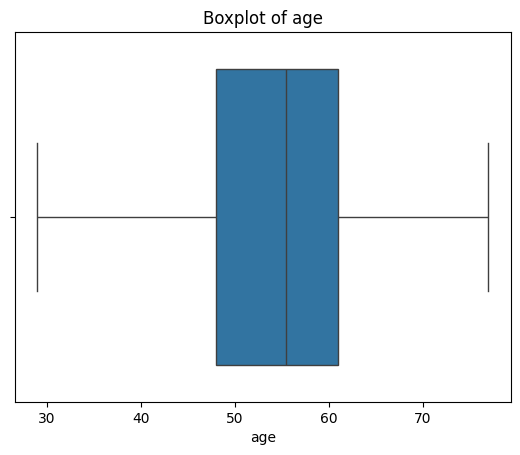

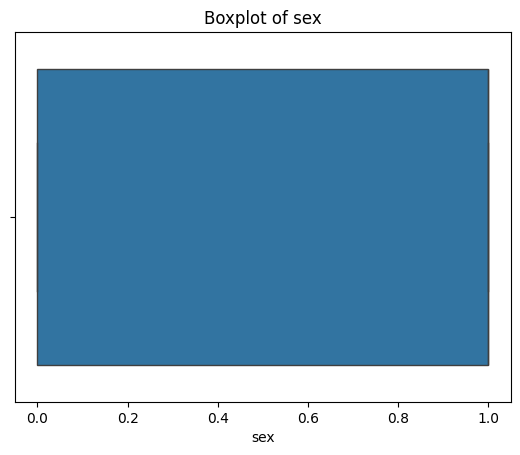

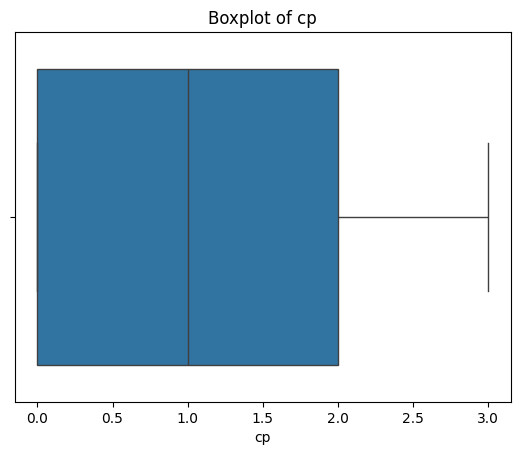

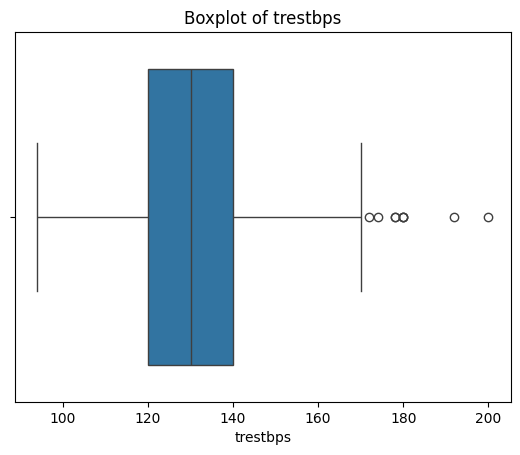

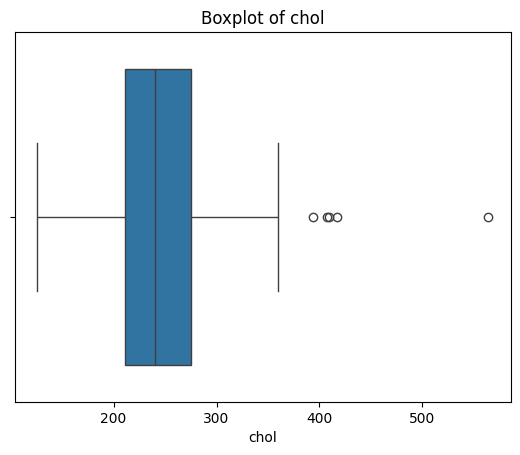

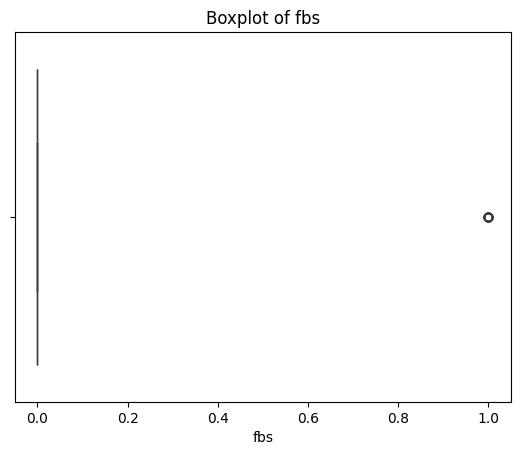

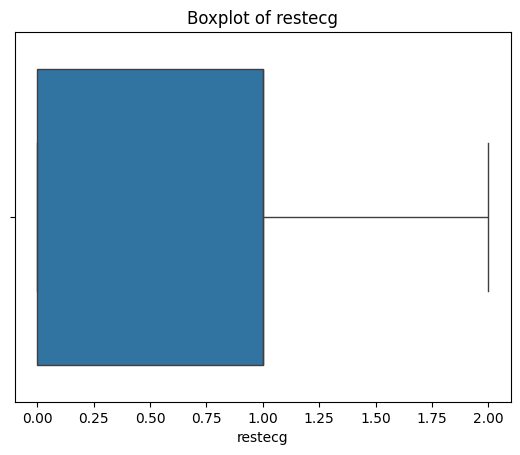

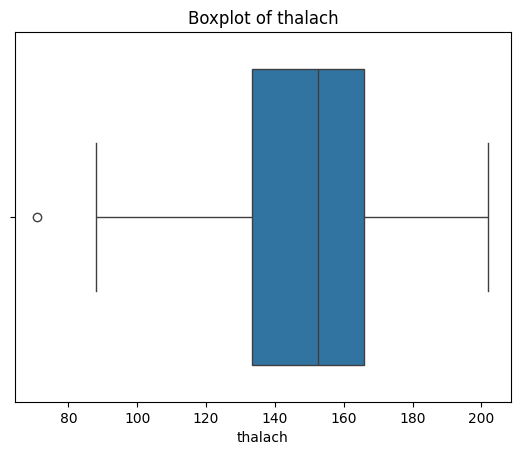

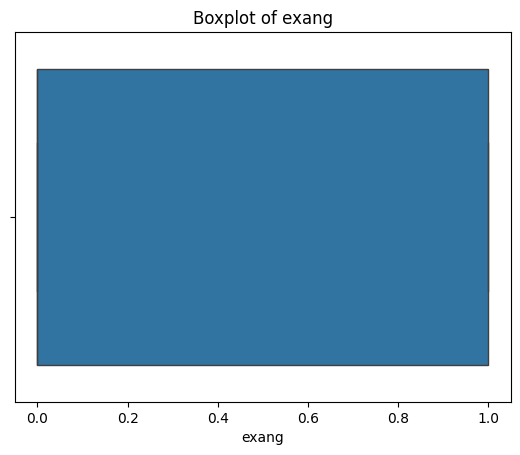

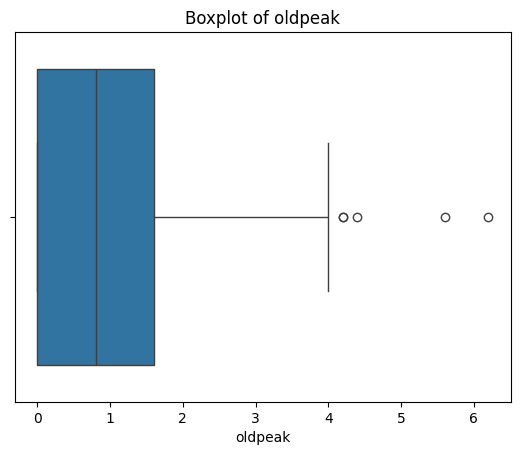

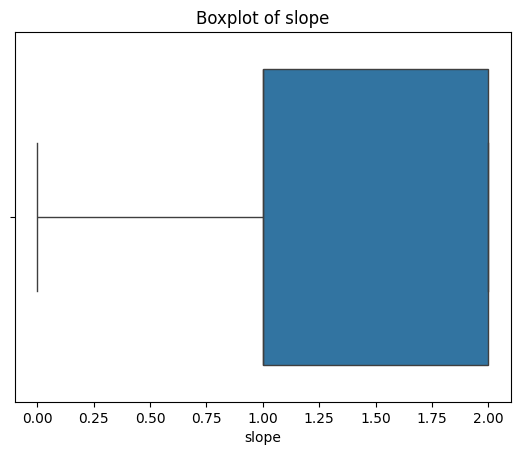

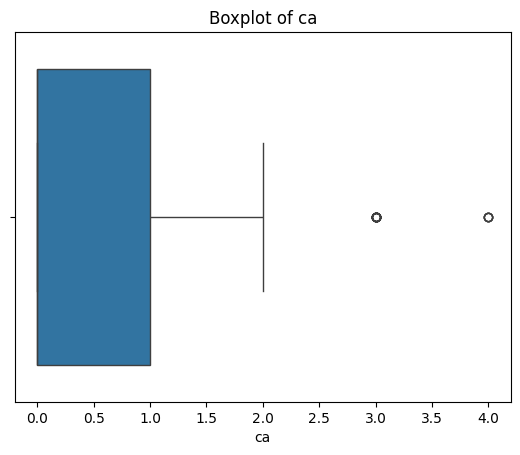

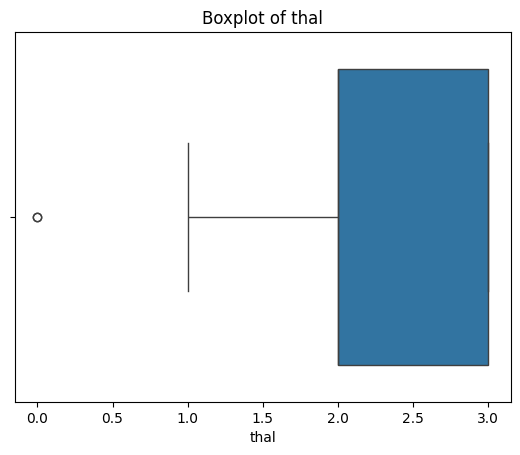

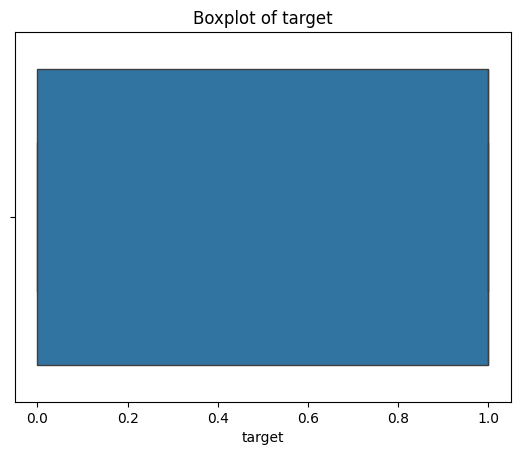

In [234]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [235]:
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(df.shape[0])

283


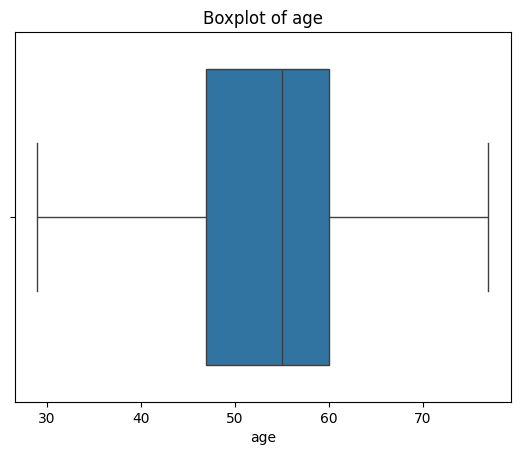

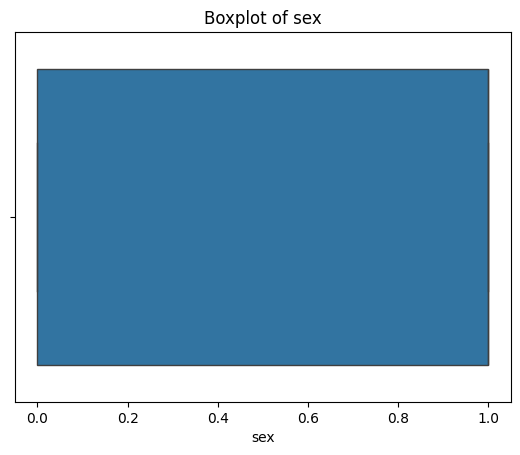

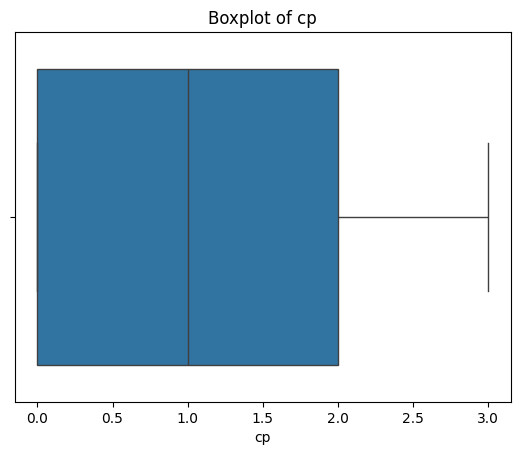

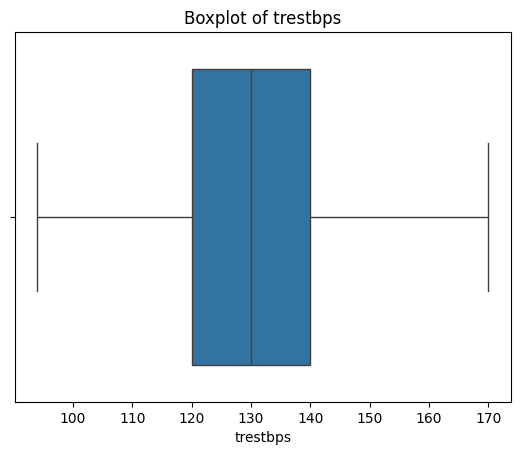

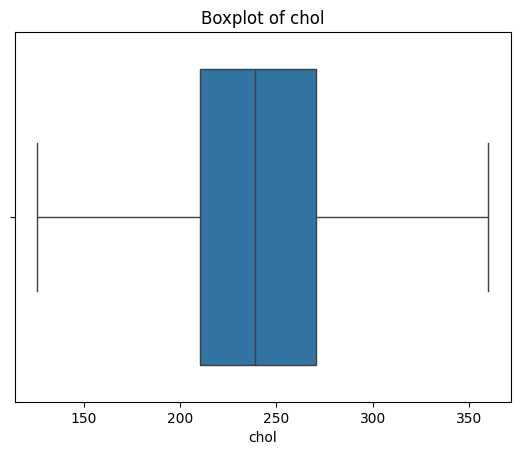

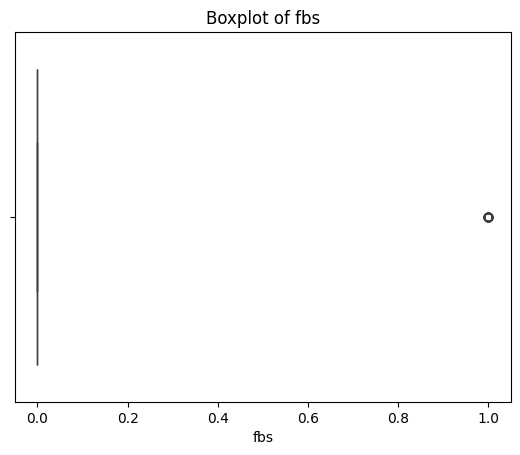

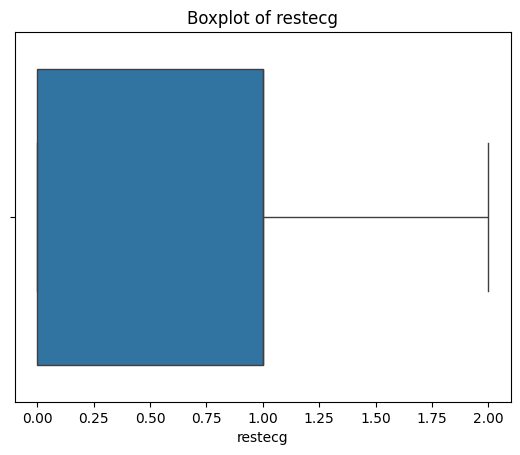

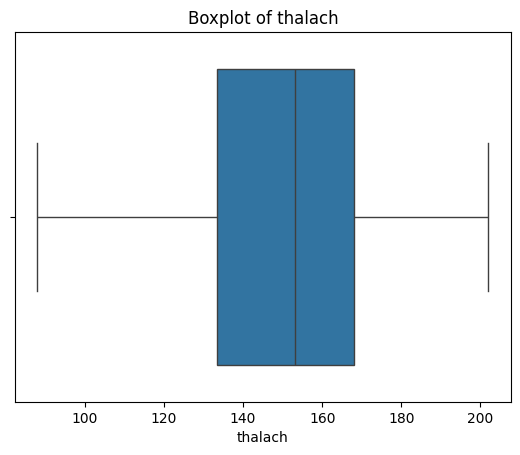

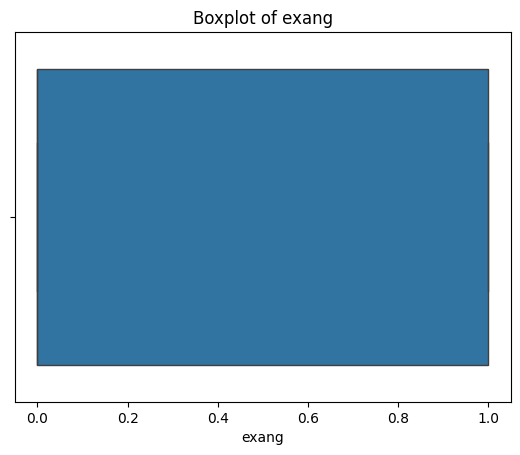

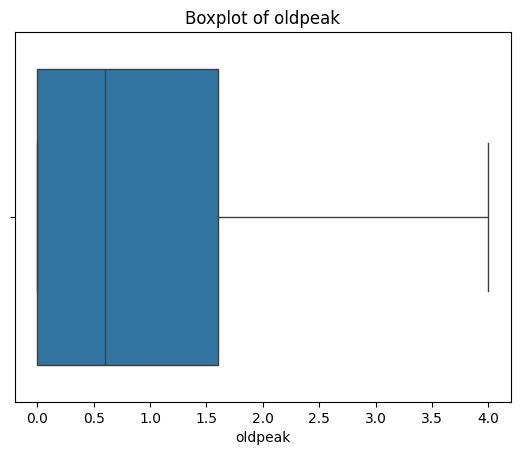

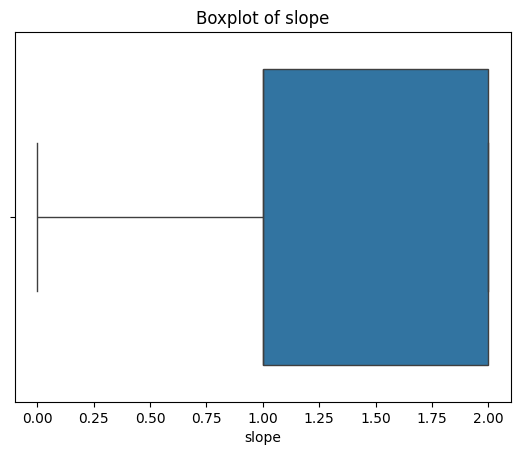

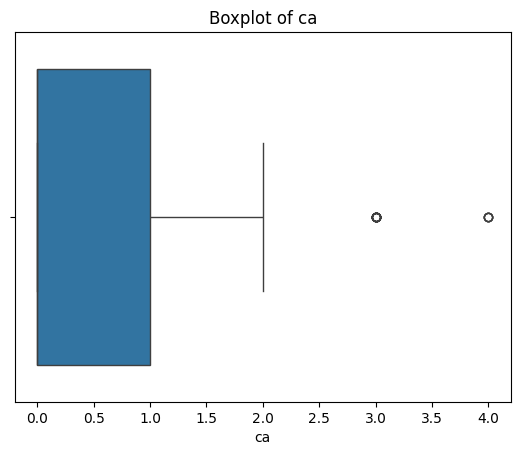

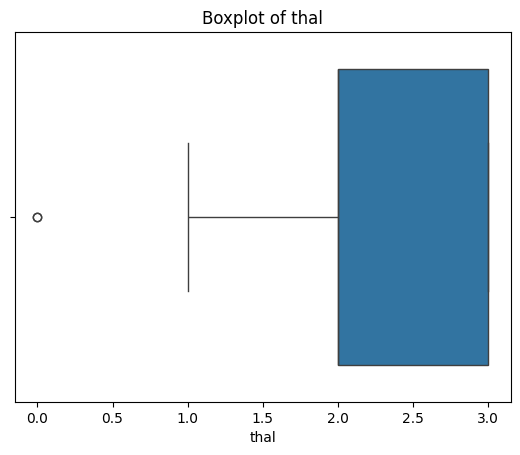

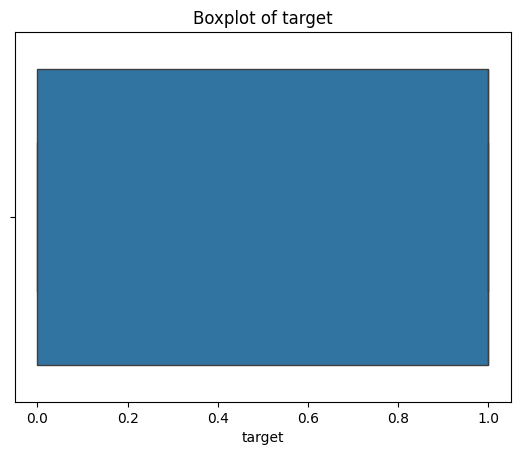

In [236]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [237]:
print(df['target'].value_counts(normalize=True) * 100)


target
1    55.830389
0    44.169611
Name: proportion, dtype: float64


In [238]:
df['thal'] = df['thal'].replace(0, np.nan)

In [239]:
df = df.dropna()

In [240]:
df_encoded = pd.get_dummies(df, columns=['cp', 'thal', 'restecg'], drop_first=True)

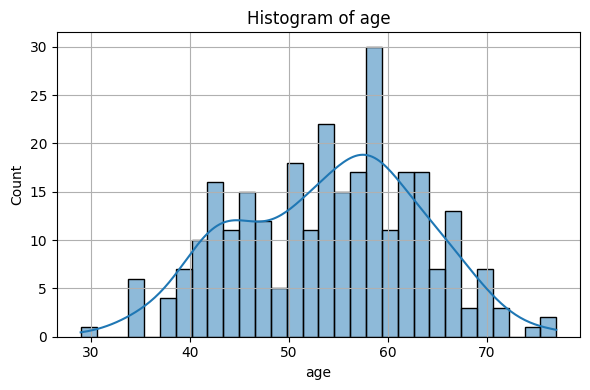

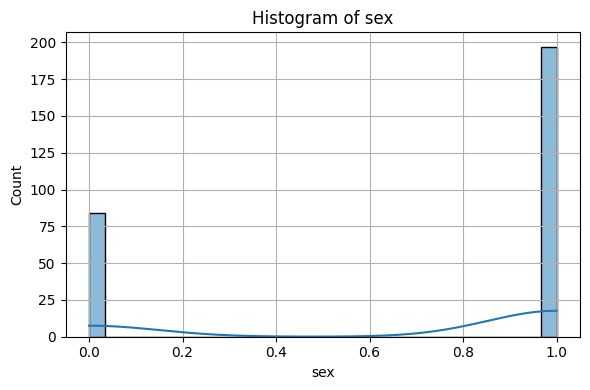

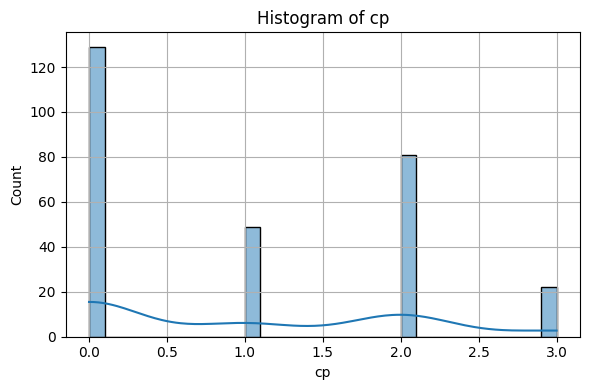

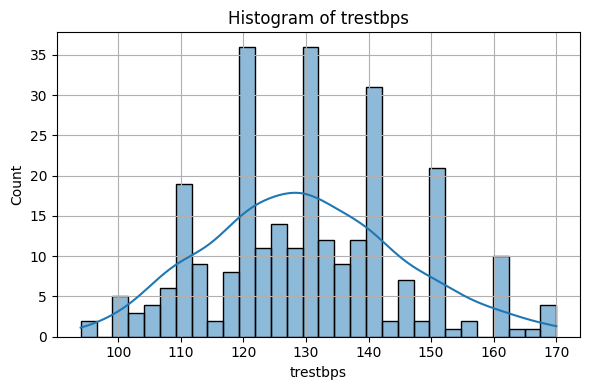

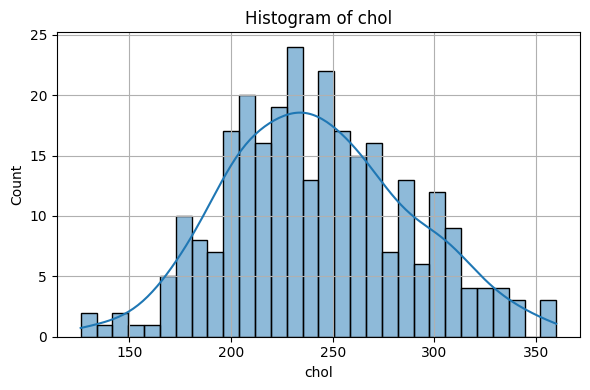

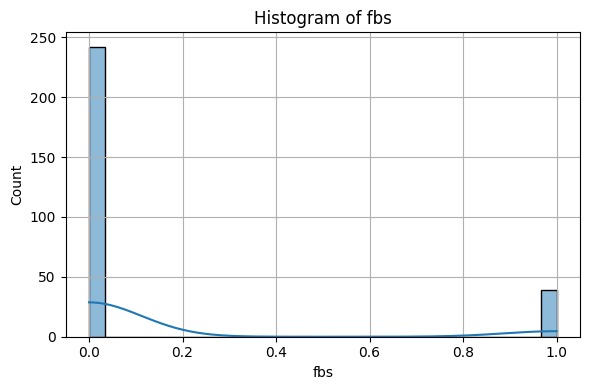

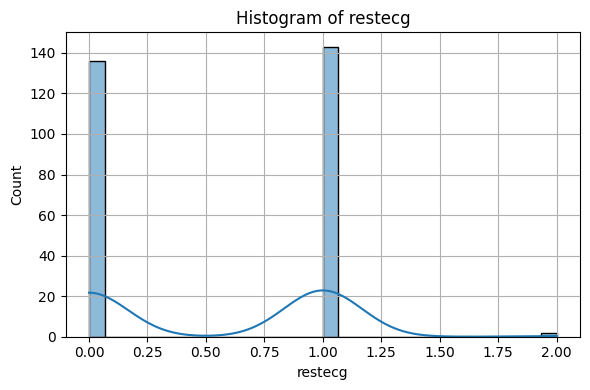

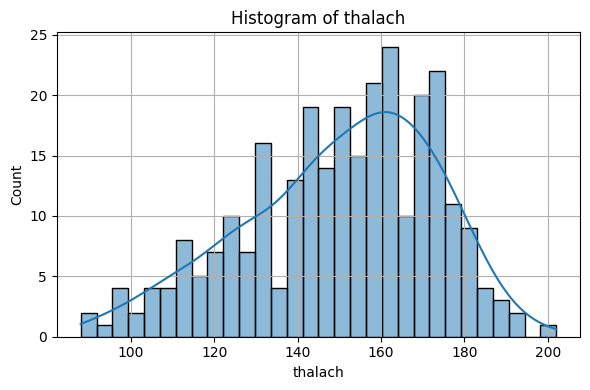

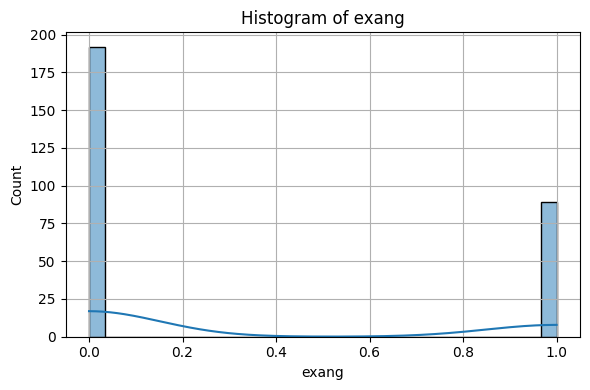

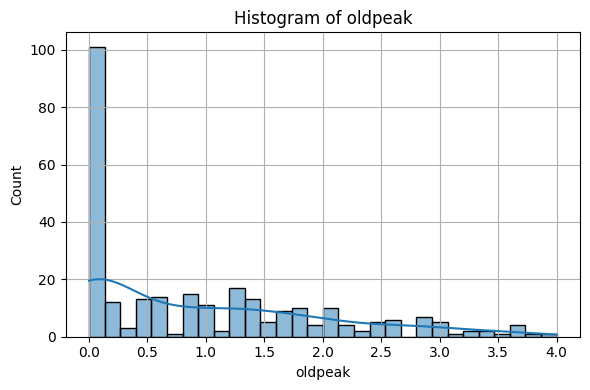

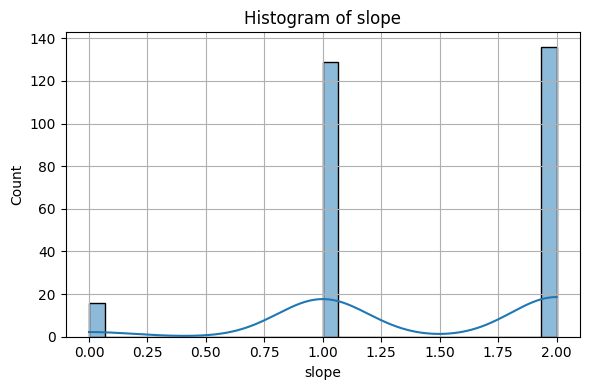

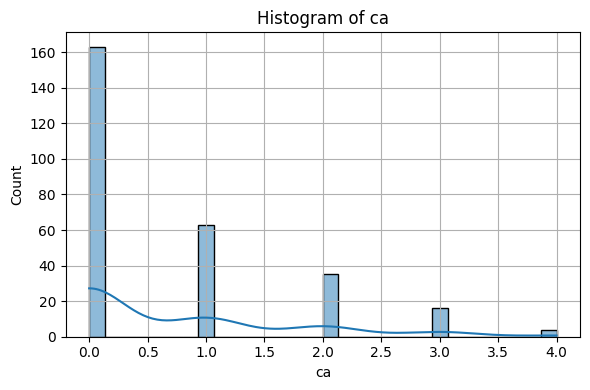

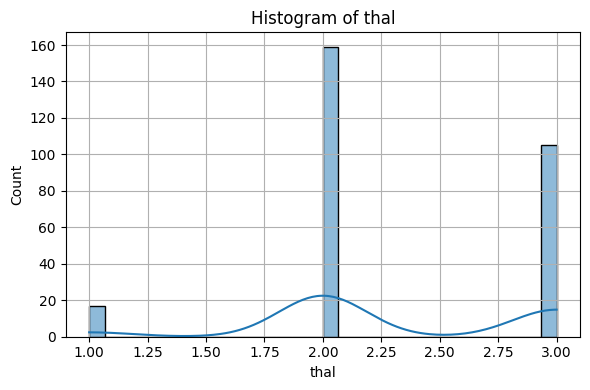

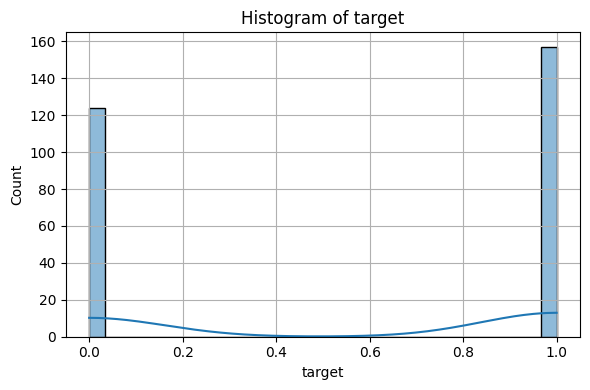

In [241]:
# رسم Histogram لكل عمود رقمي
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


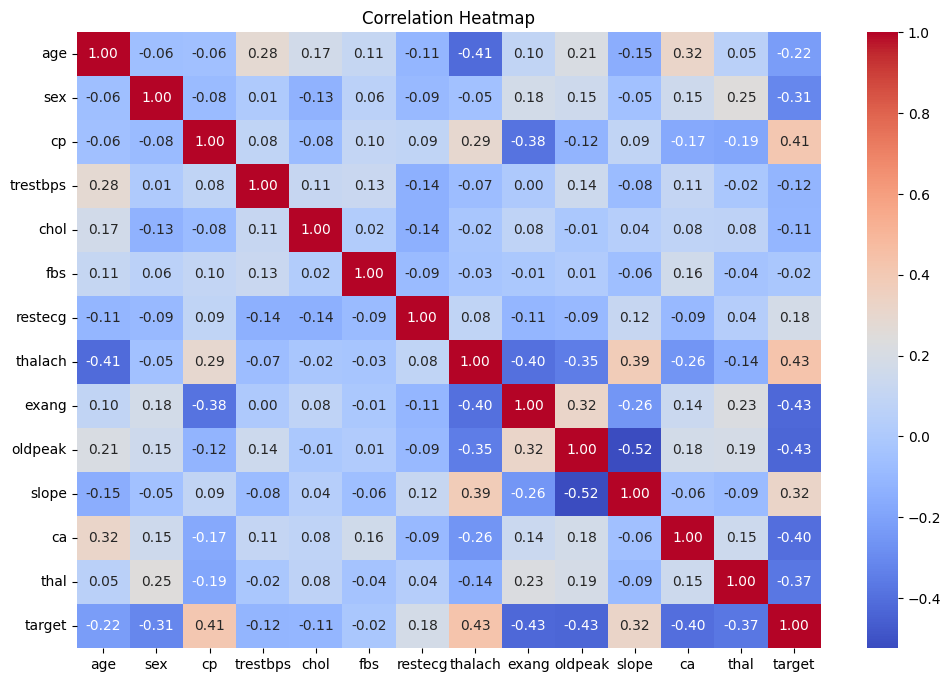

In [242]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


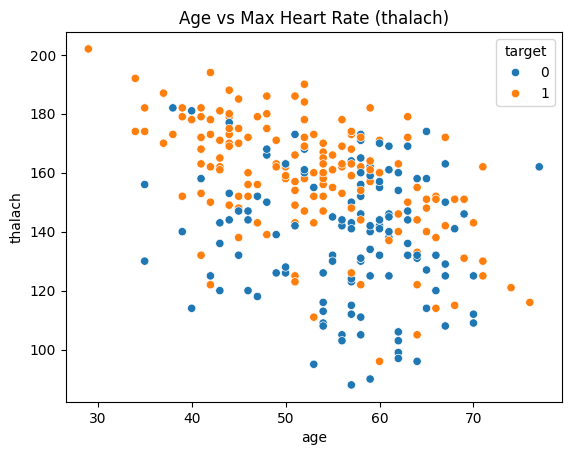

In [243]:
sns.scatterplot(data=df, x='age', y='thalach', hue='target')
plt.title("Age vs Max Heart Rate (thalach)")
plt.show()


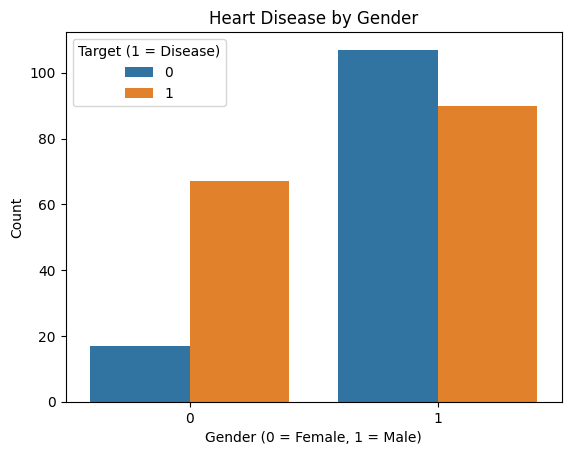

In [244]:
sns.countplot(x='sex', hue='target', data=df)
plt.title("Heart Disease by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title='Target (1 = Disease)')
plt.show()


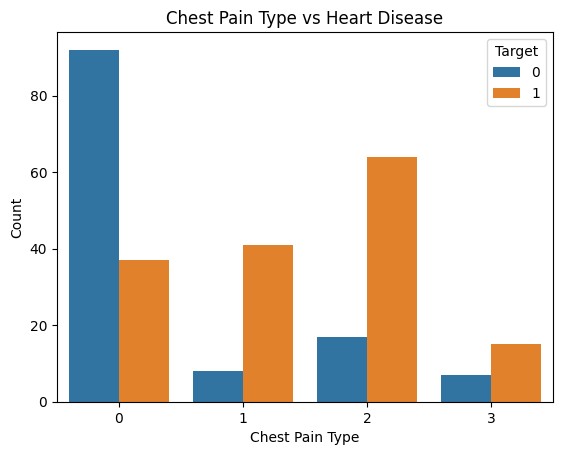

In [245]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title='Target')
plt.show()


In [246]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']


In [247]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [249]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [250]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_scaled)

print( accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8070175438596491
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.82      0.79      0.81        29

    accuracy                           0.81        57
   macro avg       0.81      0.81      0.81        57
weighted avg       0.81      0.81      0.81        57



In [251]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [252]:
y_pred = model.predict(X_test_scaled)

# طباعة النتائج
print( accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7543859649122807
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.74      0.79      0.77        29

    accuracy                           0.75        57
   macro avg       0.76      0.75      0.75        57
weighted avg       0.76      0.75      0.75        57



In [253]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [254]:
# تدريب النموذج
xgb_model.fit(X_train_scaled, y_train)

# التنبؤ على مجموعة الاختبار
y_pred = xgb_model.predict(X_test_scaled)

# تقييم النموذج
print( accuracy_score(y_test, y_pred))
print( classification_report(y_test, y_pred))

0.7192982456140351
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        28
           1       0.71      0.76      0.73        29

    accuracy                           0.72        57
   macro avg       0.72      0.72      0.72        57
weighted avg       0.72      0.72      0.72        57



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:19:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
